<a href="https://colab.research.google.com/github/martianjob/chatbot/blob/main/capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [106]:
import numpy as np
import pandas as pd
import os
import string
import random, re
import contractions

In [107]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [108]:

os.chdir('/content/drive/My Drive/Colab Notebooks/NLP/CAPSTONE/')

In [109]:
# locading input data from csv 
print("Loading the input csv data")
data = pd.read_csv("IHMStefanini_industrial_safety_and_health_database_with_accidents_description.csv")
data.head(5)

Loading the input csv data


,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [110]:
print("*"*30)
print("Droping unwanted coulmns")
data = data.drop(data.columns[[0,1,2,3]],axis=1)


******************************
Droping unwanted coulmns


In [111]:
data.head(5)

,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [112]:
# Removing punctuations
data['Description'] = data['Description'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
print(f'punctuations {string.punctuation} removed from Description coulmn')

punctuations !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~ removed from Description coulmn


In [113]:
# contractions expension
#!pip install contractions
data['Description'] = data['Description'].apply(lambda x: contractions.fix(x))
print("contractions expension on the Description column completed")

contractions expension on the Description column completed


In [114]:
# Convert text to lowercase
data['Description'] = data['Description'].apply(lambda x: x.lower())
print("Converted Description to lowercase")

Converted Description to lowercase


In [115]:
#Remove single letter word
data['Description'] = data['Description'].apply(lambda x:re.sub(r'\b\w{1}\b',"",x ,flags=re.I))
print("Removed the single letter from the Description column data")

Removed the single letter from the Description column data


In [116]:
#Remove NA
data['Description'] = data['Description'].apply(lambda x:re.sub(r'\bNA\b',"",x ,flags=re.I))
print("Removed the NA from the Description column data")

Removed the NA from the Description column data


In [117]:
#Removing the email addresses
data['Description'] = data['Description'].apply(lambda x: re.sub(r"\S+@\S+", "",x ,flags=re.I))
print("Removed email id from the Description column data")

Removed email id from the Description column data


In [118]:
#Remove all date formats 
#pattern_str="^(?:\d{1,2}(?:(?:-|/)|(?:th|st|nd|rd)?\s))?(?:(?:(?:Jan(?:uary)?|Feb(?:ruary)?|Mar(?:ch)?|Apr(?:il)?|May|Jun(?:e)?|Jul(?:y)?|Aug(?:ust)?|Sep(?:tember)?|Oct(?:ober)?|Nov(?:ember)?|Dec(?:ember)?)(?:(?:-|/)|(?:,|\.)?\s)?)?(?:\d{1,2}(?:(?:-|/)|(?:th|st|nd|rd)?\s))?)(?:\d{2,4})$"
data['Description'] = data['Description'].apply(lambda x: re.sub(r"^(?:\d{1,2}(?:(?:-|/)|(?:th|st|nd|rd)?\s))?(?:(?:(?:Jan(?:uary)?|Feb(?:ruary)?|Mar(?:ch)?|Apr(?:il)?|May|Jun(?:e)?|Jul(?:y)?|Aug(?:ust)?|Sep(?:tember)?|Oct(?:ober)?|Nov(?:ember)?|Dec(?:ember)?)(?:(?:-|/)|(?:,|\.)?\s)?)?(?:\d{1,2}(?:(?:-|/)|(?:th|st|nd|rd)?\s))?)(?:\d{2,4})$", "",x ,flags=re.I))
print("Removed date from the Description column data")

Removed date from the Description column data


In [119]:
#Remove digits
data['Description'] = data['Description'].apply(lambda x: re.sub(r"\d", "",x ,flags=re.I))
print("Removed digits from the Description column data")

Removed digits from the Description column data


In [120]:
# Strip unwanted spaces
data['Description'] = data['Description'].apply(lambda x: re.sub(' +', ' ', x))
print("Striped unwanted spaces from the Description column data")


Striped unwanted spaces from the Description column data


In [121]:
# Removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
data['Description'] = data['Description'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords]))
print("Removed the stopwords in the Description column")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Removed the stopwords in the Description column


In [122]:
data['Description'].head(10)

0    removing drill rod jumbo maintenance superviso...
1    activation sodium sulphide pump piping uncoupl...
2    substation milpo located level collaborator ex...
3    approximately nv cx ob personnel begins task u...
4    approximately circumstances mechanics anthony ...
5    unloading operation ustulado bag need unclog d...
6    collaborator reports street holding left hand ...
7    approximately pm mechanic technician josé tecn...
8    employee sitting resting area level raise bore...
9    moment forklift operator went manipulate big b...
Name: Description, dtype: object

In [123]:
print("Lemetizeing the words")
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
wordNet = WordNetLemmatizer()
#data['Description'] = data['Description'].apply(lambda x: ' '.join([ wordNet.lemmatize(word)  for word in x.split()]))

def lem(text):
    pos_dict = {'N': wn.NOUN, 'V': wn.VERB, 'J': wn.ADJ, 'R': wn.ADV }
    return(' '.join([wordNet.lemmatize(w,pos_dict.get(t, wn.NOUN)) for w,t in nltk.pos_tag(text.split())]))

print('Applying Lemmatizer')
data['Description'] = data['Description'].apply(lambda x: lem(x))

Lemetizeing the words
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Applying Lemmatizer


In [124]:
data['Description'].head(10)

0    removing drill rod jumbo maintenance superviso...
1    activation sodium sulphide pump piping uncoupl...
2    substation milpo located level collaborator ex...
3    approximately nv cx ob personnel begin task un...
4    approximately circumstance mechanic anthony gr...
5    unloading operation ustulado bag need unclog d...
6    collaborator report street holding left hand v...
7    approximately pm mechanic technician josé tecn...
8    employee sitting resting area level raise bore...
9    moment forklift operator went manipulate big b...
Name: Description, dtype: object

In [125]:
text=" ".join(description for description in data.Description )
#text

In [126]:
len(text.split())

14018

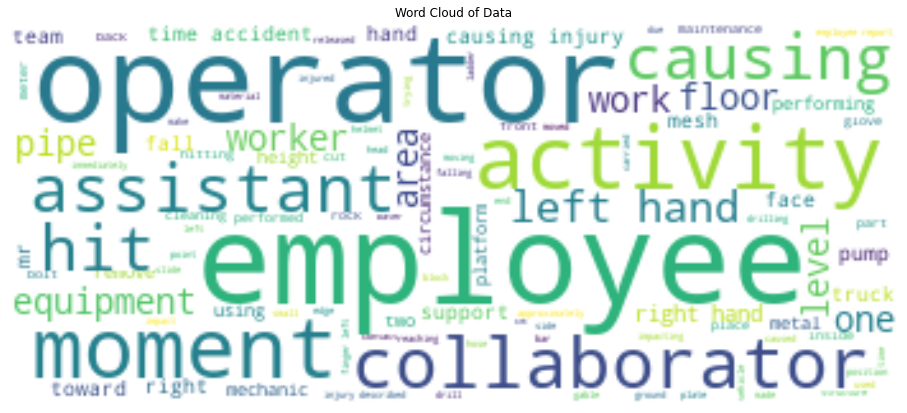

In [127]:
# lower max_font_size, change the maximum number of word and lighten the background:
def plot_wordcloud(text,title):
  wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white",width = 350, height = 150,collocations = True).generate(text)
  plt.figure(figsize=(16,8))
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.title(title)
  plt.axis("off")
  plt.show()

plot_wordcloud(text,"Word Cloud of Data")

In [128]:
data.head(1)

,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,Mining,I,IV,Male,Third Party,Pressed,removing drill rod jumbo maintenance superviso...


In [129]:
data['Critical Risk'].unique()

array(['Pressed', 'Pressurized Systems', 'Manual Tools', 'Others',
       'Fall prevention (same level)', 'Chemical substances',
       'Liquid Metal', 'Electrical installation', 'Confined space',
       'Pressurized Systems / Chemical Substances',
       'Blocking and isolation of energies', 'Suspended Loads', 'Poll',
       'Cut', 'Fall', 'Bees', 'Fall prevention', '\nNot applicable',
       'Traffic', 'Projection', 'Venomous Animals', 'Plates',
       'Projection/Burning', 'remains of choco',
       'Vehicles and Mobile Equipment', 'Projection/Choco',
       'Machine Protection', 'Power lock', 'Burn',
       'Projection/Manual Tools', 'Individual protection equipment',
       'Electrical Shock', 'Projection of fragments'], dtype=object)

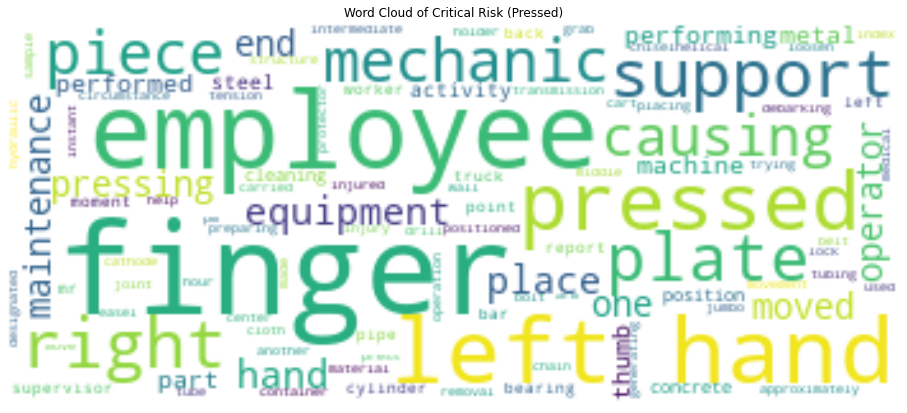

In [130]:
filter_data = ' '.join((data.loc[data['Critical Risk'] == 'Pressed']).Description)
plot_wordcloud(filter_data,"Word Cloud of Critical Risk (Pressed)")

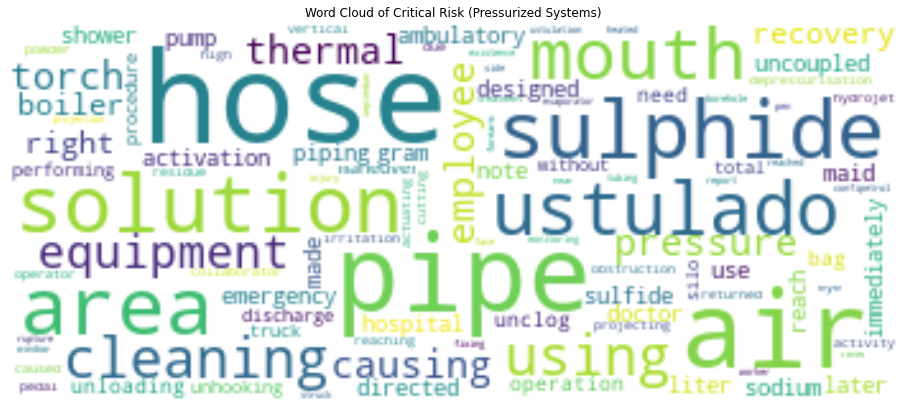

In [131]:
filter_data = ' '.join((data.loc[data['Critical Risk'] == 'Pressurized Systems']).Description)
plot_wordcloud(filter_data,"Word Cloud of Critical Risk (Pressurized Systems)")